# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
dataset = pd.read_csv('train.csv', encoding='latin1')
test_data = pd.read_csv('test.csv', encoding='latin1')
dataset

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [ ]:
dataset = dataset[['text', 'sentiment']]
test_data = test_data[['text', 'sentiment']]

In [ ]:
dataset['text'].fillna('', inplace=True)
test_data['text'].fillna('', inplace=True)

<ipython-input-4-d8ad73b39a1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'].fillna('', inplace=True)
<ipython-input-4-d8ad73b39a1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'].fillna('', inplace=True)


In [ ]:
#check if any null value present
dataset.isnull().any()

text         False
sentiment    False
dtype: bool

In [ ]:
def sentiment_to_number(sentiment):
  if sentiment == 'positive':
    return 0
  elif sentiment == 'negative':
    return 1
  else:
    return 2

In [ ]:
dataset['sentiment'] = dataset['sentiment'].apply(sentiment_to_number)
test_data['sentiment'] = test_data['sentiment'].apply(sentiment_to_number)

<ipython-input-7-33b288773fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sentiment'] = dataset['sentiment'].apply(sentiment_to_number)
<ipython-input-7-33b288773fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['sentiment'] = test_data['sentiment'].apply(sentiment_to_number)


In [ ]:
#last state of dataset before preprocessing
dataset

,text,sentiment
0,"I`d have responded, if I were going",2
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...",1
...,...,...
27476,wish we could come see u on Denver husband l...,1
27477,I`ve wondered about rake to. The client has ...,1
27478,Yay good for both of you. Enjoy the break - y...,0
27479,But it was worth it ****.,0


# Preprocessing

For preprocessing, we will use nltk library, from that library we aim to use stopwords, lemmatization, stemming methods to process and clean our data.


reference: https://www.nltk.org/index.html

In preprocessing, we will do

* removal of stopwords,
* removal of punctuations,
* lemmatizing,
* removal of special characters,
* lowercase conversion
* tokenization

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import re

In [ ]:
#stopwords and punctuation marks list

to_be_removed = stopwords.words('english') + list(punctuation)

In [ ]:
stemmer = LancasterStemmer()

corpus = dataset['text'].tolist()

cleaned_corpus = []
final_corpus = []

for i in dataset.index:
  text = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])

  #convert to lowercase
  text = text.lower()

  #remove tags
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

  # remove special characters and digits
  text=re.sub("(\\d|\\W)+"," ",text)

  #convert to list from string
  text = text.split()

  #lemmatisation
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(word) for word in text if not word in to_be_removed]

  #stemming
  text = [stemmer.stem(word) for word in text]

  cleaned_corpus.append(text)
  final_corpus.append(' '.join(text))


In [ ]:
cleaned_data = pd.DataFrame()
cleaned_data['text'] = final_corpus
cleaned_data['sentiment'] = dataset['sentiment'].values
cleaned_data

,text,sentiment
0,respond going,2
1,sooo sad miss san diego,1
2,bos bul,1
3,interview leav alon,1
4,son put releas already bought,1
...,...,...
27476,wish could com see u denv husband lost job afford,1
27477,wond rak cli mad clear net forc dev learn new ...,1
27478,yay good enjoy break prob nee hect weekend tak...,0
27479,wor,0


In [ ]:
stemmer = LancasterStemmer()

test_corpus = test_data['text'].tolist()

cleaned_test_corpus = []
final_test_corpus = []

for i in test_data.index:
  text = re.sub('[^a-zA-Z]', ' ', test_data['text'][i])

  #convert to lowercase
  text = text.lower()

  #remove tags
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

  # remove special characters and digits
  text=re.sub("(\\d|\\W)+"," ",text)

  #convert to list from string
  text = text.split()

  #lemmatisation
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(word) for word in text if not word in to_be_removed]

  #stemming
  text = [stemmer.stem(word) for word in text]

  cleaned_test_corpus.append(text)
  final_test_corpus.append(' '.join(text))

In [ ]:
cleaned_test_data = pd.DataFrame()
cleaned_test_data['text'] = final_test_corpus
cleaned_test_data['sentiment'] = test_data['sentiment'].values
cleaned_test_data

,text,sentiment
0,last sess day http twitp com ezh,2
1,shangha also real excit prec skyscrap gal good...,0
2,recess hit veron branquinho quit company sham,1
3,happy bday,0
4,http twitp com w p lik,0
...,...,...
4810,,2
4811,,2
4812,,2
4813,,2


In [ ]:
x_train = np.array(cleaned_data['text'].tolist())
y_train = np.array(cleaned_data['sentiment'].tolist())
x_test = np.array(cleaned_test_data['text'].tolist())
y_test = np.array(cleaned_test_data['sentiment'].tolist())

In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

len(tokenizer.word_index)

18107

In [ ]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
x_train = pad_sequences(x_train, padding='post', maxlen=35)
x_test = pad_sequences(x_test, padding='post', maxlen=35)

# Creating and training the model

In [ ]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 5)             100000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1216      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 101315 (395.76 KB)
Trainable params: 101315 (395.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
859/859 [==============================] - 43s 46ms/step - loss: 0.9017 - accuracy: 0.5712 - val_loss: 0.6878 - val_accuracy: 0.7537
Epoch 2/50
859/859 [==============================] - 30s 35ms/step - loss: 0.6839 - accuracy: 0.7251 - val_loss: 0.6329 - val_accuracy: 0.7676
Epoch 3/50
859/859 [==============================] - 38s 44ms/step - loss: 0.5849 - accuracy: 0.7755 - val_loss: 0.5932 - val_accuracy: 0.7688
Epoch 4/50
859/859 [==============================] - 29s 34ms/step - loss: 0.5115 - accuracy: 0.8124 - val_loss: 0.5956 - val_accuracy: 0.7643
Epoch 5/50
859/859 [==============================] - 33s 38ms/step - loss: 0.4593 - accuracy: 0.8350 - val_loss: 0.6538 - val_accuracy: 0.7568
Epoch 6/50
859/859 [==============================] - 31s 36ms/step - loss: 0.4128 - accuracy: 0.8554 - val_loss: 0.6528 - val_accuracy: 0.7578
Epoch 7/50
859/859 [==============================] - 29s 34ms/step - loss: 0.3720 - accuracy: 0.8691 - val_loss: 0.6515 - val_accuracy:

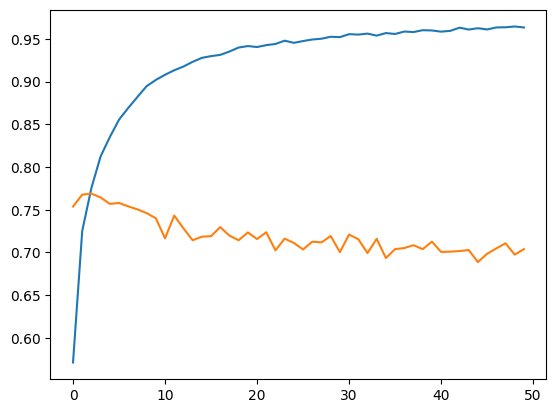

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Prediction

In [ ]:
def predictTheSentiment(textToPredict):
  textToPredict = tokenizer.texts_to_sequences([textToPredict])
  textToPredict = pad_sequences(textToPredict, padding='post', maxlen=35)  # Use the max_len determined during training
  predictions = model.predict(textToPredict)
  predicted_class_index = predictions.argmax(axis=-1)
  if predicted_class_index[0] == 0:
    print("Postive Sentiment");
  elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
  else:
    print("Neutral Sentiment")

In [ ]:
# Prediction 1
text = "The movie was bad bad bad, i will not recommend this movie to anyone"

predictTheSentiment(text)

1/1 [==============================] - 0s 331ms/step
Negative Sentiment


In [ ]:
# Prediction 2

text = "The movie was good, i will recommend this movie to anyone"

predictTheSentiment(text)

1/1 [==============================] - 1s 828ms/step
Postive Sentiment


In [ ]:
# Prediction 3
# We leave this part to make predictions with any text you want

text = ""

predictTheSentiment(text)

# Downloading the trained model

In [ ]:
import pickle

# save the model as a pickle file
model_pkl_file = "sentiment_analysis_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

tokenizer_pkl_file = "tokenizer.pkl"

with open(tokenizer_pkl_file, 'wb') as file:
    pickle.dump(tokenizer, file)